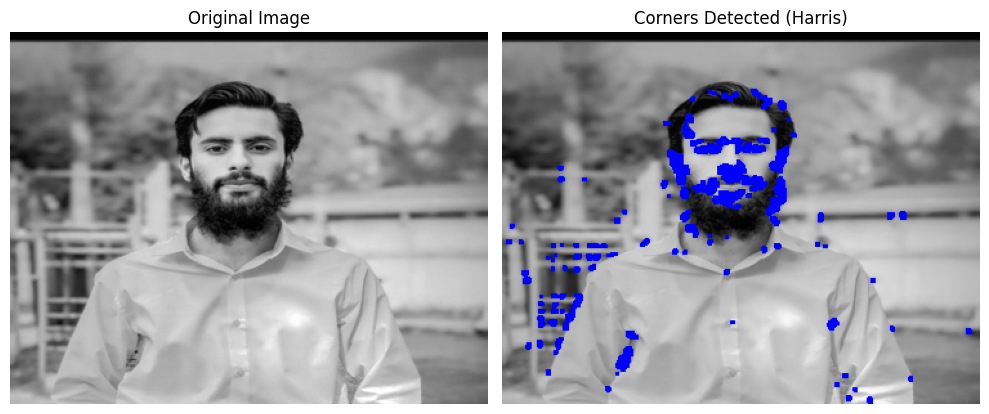

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/Samama.png', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    raise FileNotFoundError("Image not found or could not be loaded.")

# Step 1: Compute the gradients (Ix and Iy)
Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction

# Step 2: Compute the structure tensor
Ix2 = Ix ** 2  # I_x^2
Iy2 = Iy ** 2  # I_y^2
Ixy = Ix * Iy  # I_x * I_y

# Step 3: Compute the sums of the products (Gaussian filter for smoothing)
window_size = 5  # Window size for Gaussian smoothing
Ix2_sum = cv2.GaussianBlur(Ix2, (window_size, window_size), 0)
Iy2_sum = cv2.GaussianBlur(Iy2, (window_size, window_size), 0)
Ixy_sum = cv2.GaussianBlur(Ixy, (window_size, window_size), 0)

# Step 4: Compute the Harris corner response (R)
k = 0.04  # Harris detector constant
determinant = Ix2_sum * Iy2_sum - Ixy_sum ** 2
trace = Ix2_sum + Iy2_sum
R = determinant - k * trace ** 2

# Step 5: Thresholding the response to find corners
threshold = 0.01 * R.max()
corners = R > threshold

# Step 6: Non-maximum suppression
corners = cv2.dilate(corners.astype(np.uint8), None)  # Dilate to fill the corners

# Visualize the corners on the image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
output_image[corners == 1] = [0, 0, 255]  # Mark corners in red

# Plot the original image and the detected corners
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Corners Detected (Harris)')
plt.imshow(output_image)
plt.axis('off')

plt.tight_layout()
plt.show()
